In [1]:
import pandas as pd
import tqdm
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor
from sklearn.decomposition import PCA
import seaborn as sns

D:\Anaconda\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
df = pd.read_csv('train.csv')
X = df.iloc[:, :-1]
y = df['target']

# Load data from CSV file.
# Split dataframe into two parts.

In [3]:
df.head()

0    1    2    3    4    5         6         7  8    9  ...         44  \
0  236  488   16  221  382   97 -4.472136  0.107472  0  132  ...  13.340874   
1  386  206  357  232    1  198  7.810250  0.763713  1  143  ...  12.484882   
2  429   49  481  111  111  146  8.602325  0.651162  1  430  ...  14.030257   
3  414  350  481  370  208  158  8.306624  0.424645  1  340  ...   2.789577   
4  318  359   20  218  317  301  8.124038  0.767304  1  212  ...   1.886560   

         45         46         47         48         49         50         51  \
0  0.870542   1.962937   7.466666  11.547794   8.822916   9.046424   7.895535   
1  7.168680   2.885415  12.413973  10.260494  10.091351   9.270888   3.173994   
2  0.394970   8.160625  12.592059   8.937577   2.265191  11.255721  12.794841   
3  6.416708  10.549814  11.456437   6.468099   2.519049   0.258284   9.317696   
4  1.919999   2.268203   0.149421   4.105907  10.416291   6.816217   8.586960   

          52     target  
0  11.010677  20.107472  
1  13.921871  61.763713  
2  12.080951  74.651162  
3   5.383098  69.424645  
4   4.512419  66.767304  

[5 rows x 54 columns]

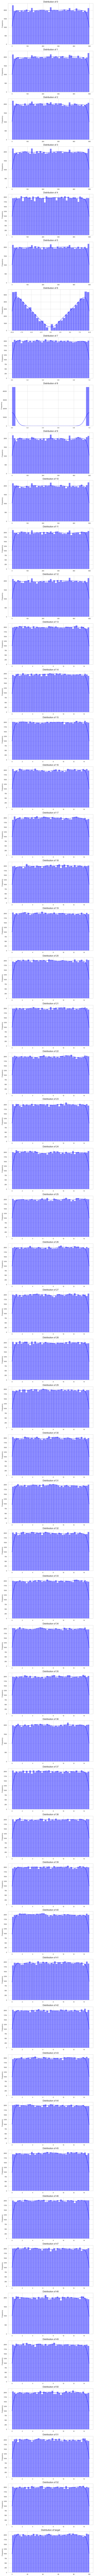

In [4]:
sns.set(style="whitegrid")

fig, axes = plt.subplots(nrows=len(df.columns), ncols=1, figsize=(10, 5 * len(df.columns)))

for i, col in enumerate(df.columns):
    sns.histplot(df[col], ax=axes[i], kde=True, color='blue')
    axes[i].set_title(f'Distribution of {col}', fontsize=16)
    axes[i].set_xlabel('')
    axes[i].set_ylabel('Frequency')

plt.tight_layout()
plt.show()

# In this block, the distribution of points for each feature was displayed in order to see how the data are distributed.
# From the presented data, it is evident that all features except 6 and 8 have a continuous uniform distribution.
# Feature 8 has a discrete uniform distribution, while feature 6 is distributed in a special way.

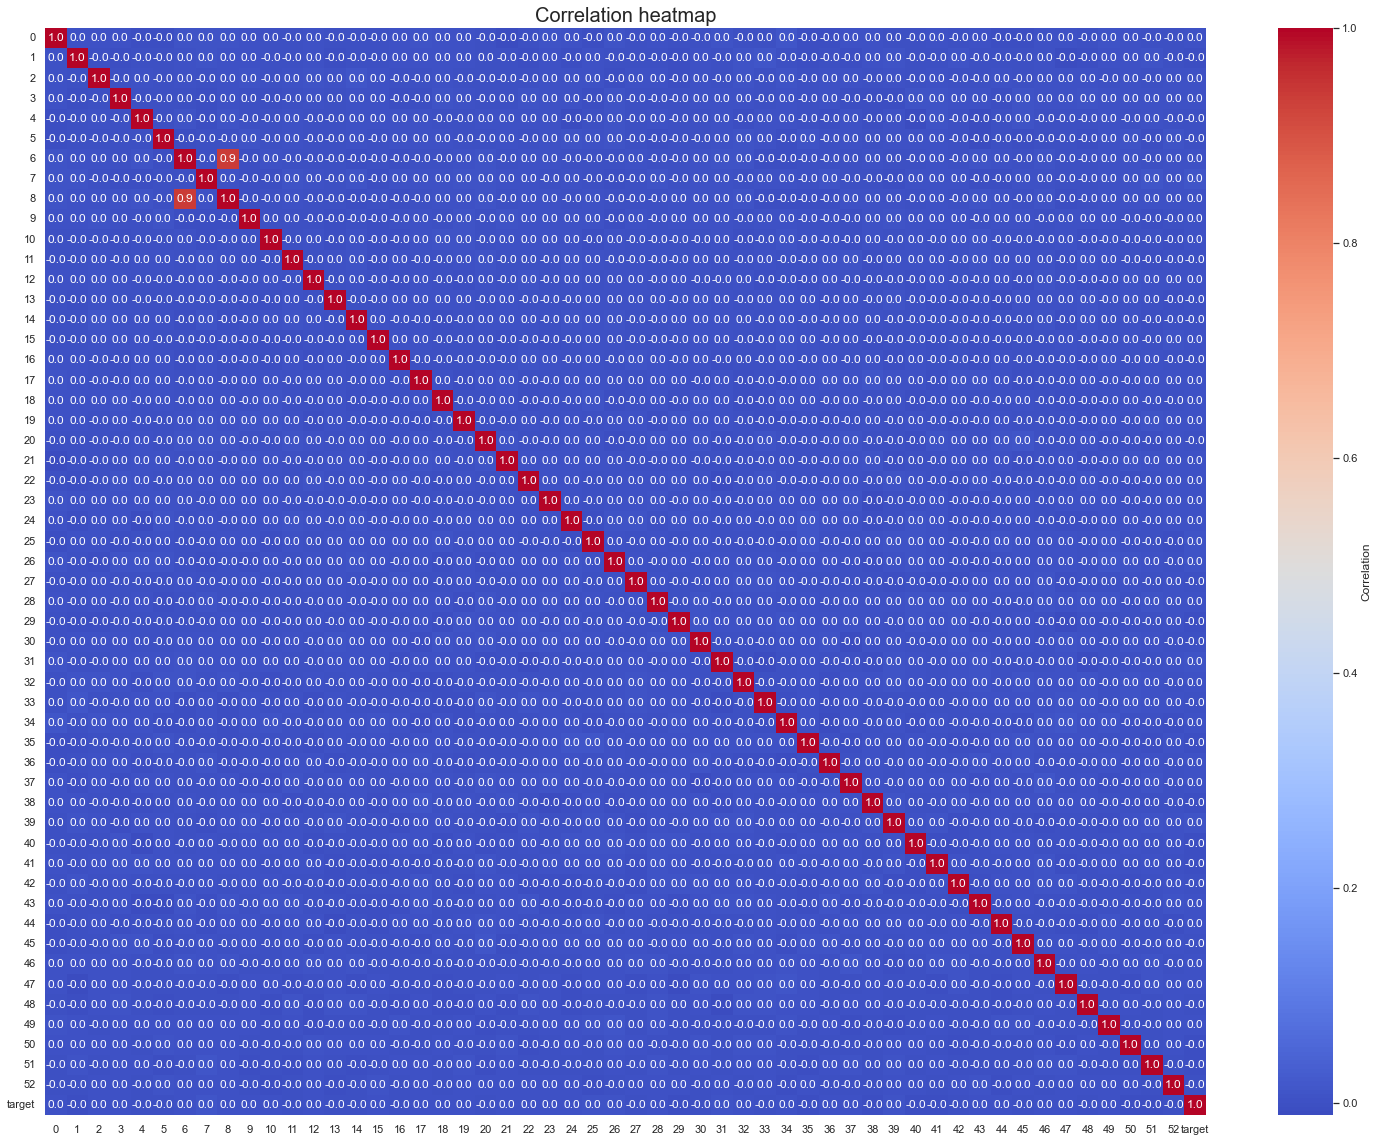

In [5]:
plt.figure(figsize=(26, 20))

sns.heatmap(df.corr(), annot=True, fmt=".1f", cmap='coolwarm', 
            cbar_kws={'label': 'Сorrelation'})

plt.title('Сorrelation heatmap', size = 20)

plt.show()

# In this block, a heatmap of correlations between features was generated.
# Almost all features have near-zero correlation with each other,
# suggesting either a very weak linear relationship or that the dependency is nonlinear.

# Additionally, we can observe a correlation close to 1 between features 6 and 8.
# This indicates a very strong positive linear dependency between them.

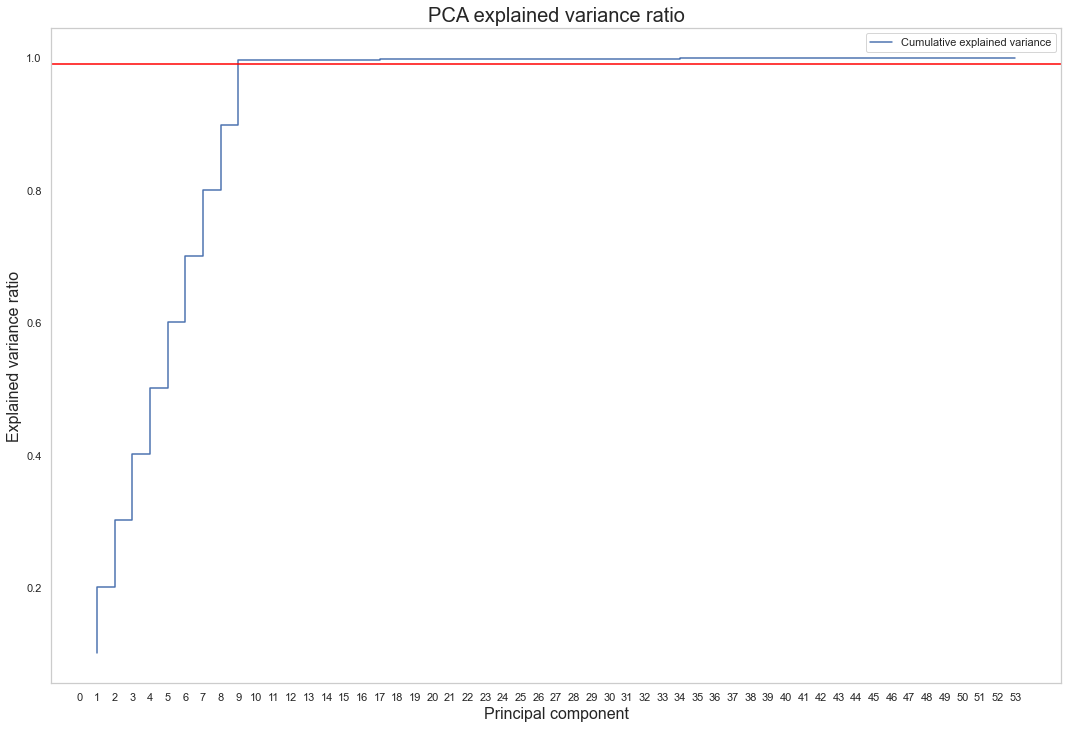

In [6]:
feature_names = X.columns

pca = PCA(n_components=X.shape[1])
pca.fit(X)

explained_variance = pca.explained_variance_ratio_

plt.figure(figsize=(15, 10))
plt.step(range(1, len(explained_variance)+1), np.cumsum(explained_variance), where='pre',
         label='Cumulative explained variance')
plt.ylabel('Explained variance ratio', size = 16)
plt.xlabel('Principal component', size = 16)
plt.legend(loc='best')
plt.tight_layout()
plt.grid()
plt.axhline(0.99, color = 'red')
plt.xticks(np.arange(0,54))
plt.title('PCA explained variance ratio', size = 20)
plt.show()

# After performing Principal Component Analysis (PCA), it's observable that dimensionality can be reduced
# to 10 components while losing no more than 1% of the data variance.

# The issue with PCA is that it may miss complex nonlinear relationships between features if they exist.

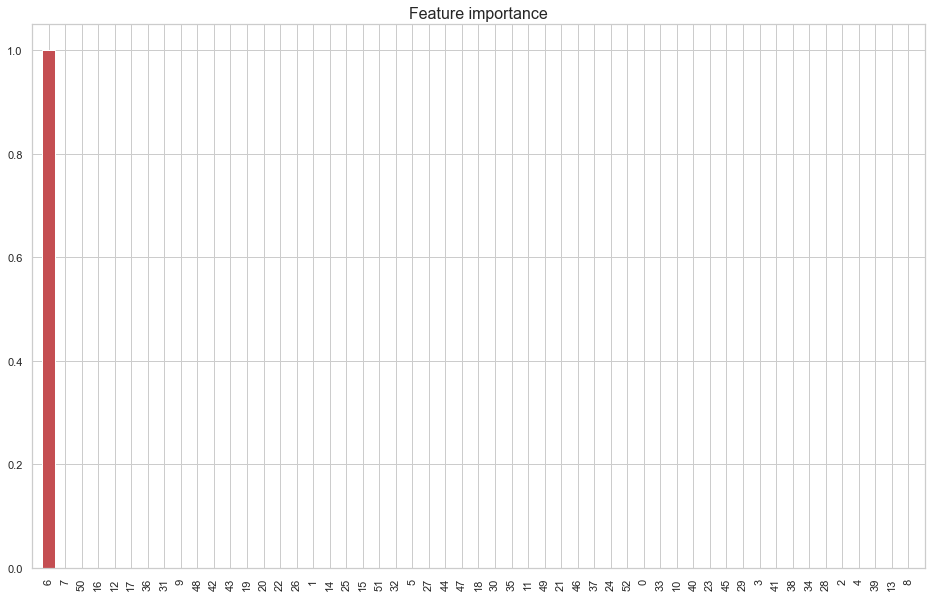

In [7]:
feature_names = X.columns

model = RandomForestRegressor(n_estimators=10, random_state=42)
model.fit(X, y)

importances = model.feature_importances_
indices = np.argsort(importances)[::-1]

plt.figure(figsize=(16,10))
plt.title("Feature importance", size = 16)
plt.bar(range(X.shape[1]), importances[indices], color="r", align="center")
plt.xticks(range(X.shape[1]), [feature_names[i] for i in indices], rotation=90)
plt.xlim([-1, X.shape[1]])
plt.show()

# In this block, a random forest was utilized to analyze the importance of features in the context of 
# predicting the target. The results show that feature 6 has almost 100% importance, while all other
# features have near-zero importance.

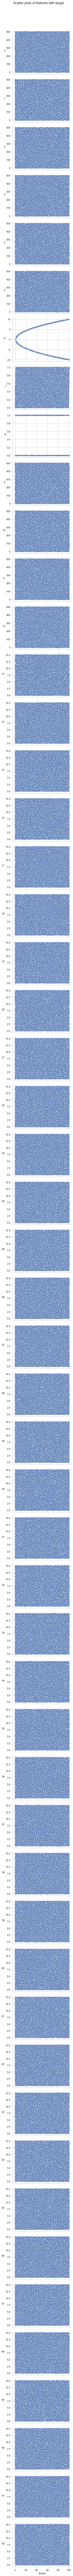

In [8]:
columns = df.columns.drop('target')

g = sns.PairGrid(df, y_vars=columns, x_vars='target', height=3, aspect=1.5)
g.map(sns.scatterplot)
g.fig.suptitle('Scatter plots of features with target', y=1.0)

for ax in g.axes.flatten():
    ax.set_xlabel(ax.get_xlabel(), rotation=0)
    ax.set_ylabel(ax.get_ylabel(), rotation=0, horizontalalignment='right')

plt.show()

# The plot illustrates a pairplot between the target and all features, showing their joint distribution.

# The results indicate that all features except for feature 6 have a joint uniform distribution with the target, 
# which does not allow us to use them in predicting the target.
# Meanwhile, the distribution between feature 6 and the target shows a clear quadratic dependency.

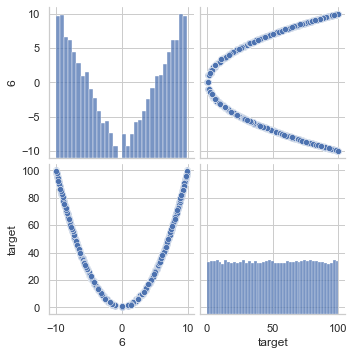

In [9]:
sns.pairplot(df.iloc[:, np.r_[6:7, -1]])
plt.show()

# A separate pairplot between feature 6 and the target.

In [10]:
df.loc[:,['6', 'target']].corr()

# Re-displaying the correlation between feature 6 and the target to confirm the absence of a linear dependency.

6    target
6       1.000000  0.000666
target  0.000666  1.000000

In [11]:
df['6**2'] = df['6']**2
df.loc[:,['6**2', 'target']].corr()

# By raising the column of feature 6 to the power of two and recalculating the correlation with the target, 
# it becomes evident that they have an almost 100% linear dependency, which confirms the hypothesis that 
# feature 6 has a quadratic dependency with the target.

6**2   target
6**2    1.00000  0.99995
target  0.99995  1.00000